### Exercise #1 

Diamonds are the crown jewel of the jewelry industry. As a luxury item, there is a broad range of quality-related characteristics and prices, designed to accommodate many customer segments. The attached data file contains sample data on 6,000 diamonds. Each row contains a summary of characteristics for each diamond, including the 4 C's (carat weight, color, clarity, cut), polish, symmetry, certifying agency (report), and price. More information on the 4 C's can be found at this link (Links to an external site.).

Use appropriate techniques for data analysis and visualization, along with relevant features in matplotlib, pandas, and Seaborn to create two high-quality visualization exhibits of your choice. You will be graded on the quality of the visualizations and your explanations of the insights, but also the richness of your story.

In [67]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [68]:
df = pd.read_csv('diamonds.csv', index_col='ID')
df.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
ID,,,,,,,,
1,1.10,Ideal,H,SI1,VG,EX,GIA,5169
2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
3,0.85,Ideal,H,SI1,EX,EX,GIA,3183
4,0.91,Ideal,E,SI1,VG,VG,GIA,4370
5,0.83,Ideal,G,SI1,EX,EX,GIA,3171


**Let's try to see how the 4 C's are affecting the Price (i.e. individually how each 'C' is influencing the Price)**

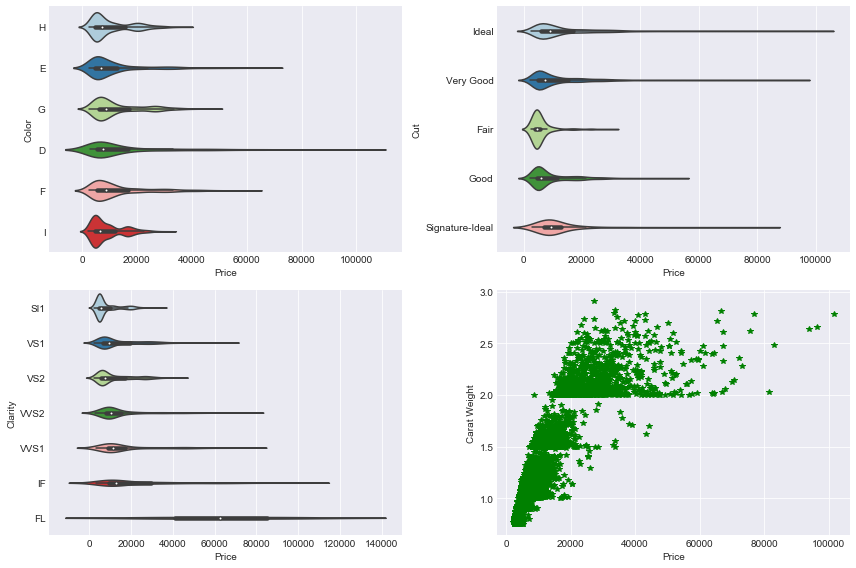

In [69]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 2, figsize=(12,8))
sns.violinplot(x='Price', y='Color', data=df, palette='Paired', ax=ax[0,0])
sns.violinplot(x='Price', y='Cut', data=df, palette='Paired', ax=ax[0,1])
sns.violinplot(x='Price', y='Clarity', data=df, palette='Paired', ax=ax[1,0])
plt.plot(df['Price'], df['Carat Weight'], 'g*')
plt.xlabel('Price')
plt.ylabel('Carat Weight')
fig.tight_layout();

**SOME INSIGHTS**
- Color and Cut alone do not influence the price as the medians of the violin plots are pretty much the same among different categories.
- In case of Clarity, we can see a slight increase in the price when moving from SI1 to IF catergory and in particular we can see a sharp increase in the price for the Clarity Catergory FL.
- In case of Carat Weight, we can see a linear relationship that if Weight increases, so does the price.
   

In [70]:
# Let's add a new column that contains the discretized Carat Weight of the Diamond
df.insert(4, 'WtCat', pd.cut(df['Carat Weight'], np.arange(0.5,3.5,0.5)))
df['WtCat'].value_counts().sort_index()

(0.5, 1.0]    1521
(1.0, 1.5]    2568
(1.5, 2.0]     738
(2.0, 2.5]    1099
(2.5, 3.0]      74
Name: WtCat, dtype: int64

**Since we discovered that Carat Weight and Clarity are important indicators, let's analyze their combined affect on the price**

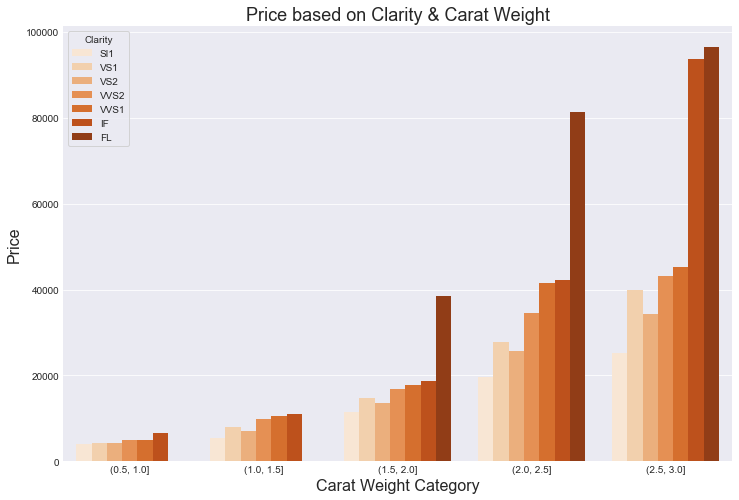

In [71]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.barplot(x='WtCat', y='Price', hue='Clarity', data=df, palette='Oranges', ci=None, estimator=np.median).legend(frameon=True, title='Clarity')
plt.ylabel('Price', fontsize=16)
plt.xlabel('Carat Weight Category', fontsize=16)
plt.title('Price based on Clarity & Carat Weight', fontsize=18);

**As anticipated, we can see that the Diamonds that have FL Clarity and a high Carat Weight, have prices that are very very high compared to the other types of diamonds (this can be seen from the long dark bars in the last 3 categories)**